# Agrupamiento por  el método KNN
Presenta: Juliho Castillo Colmenares

## Antes de empezar

El objetivo de esta actividad es que realices análisis de agrupación por “K vecinos más cercanos” y de patrones de consumo por “Market basket” a diversas bases de datos de manera que puedas generar conclusiones adecuadas.

## Paso a paso:

### Problema 1: 
- Extraiga del internet la base de datos “wine-clustering.csv”  de la siguiente liga y agréguela a un DataFrame en Python.
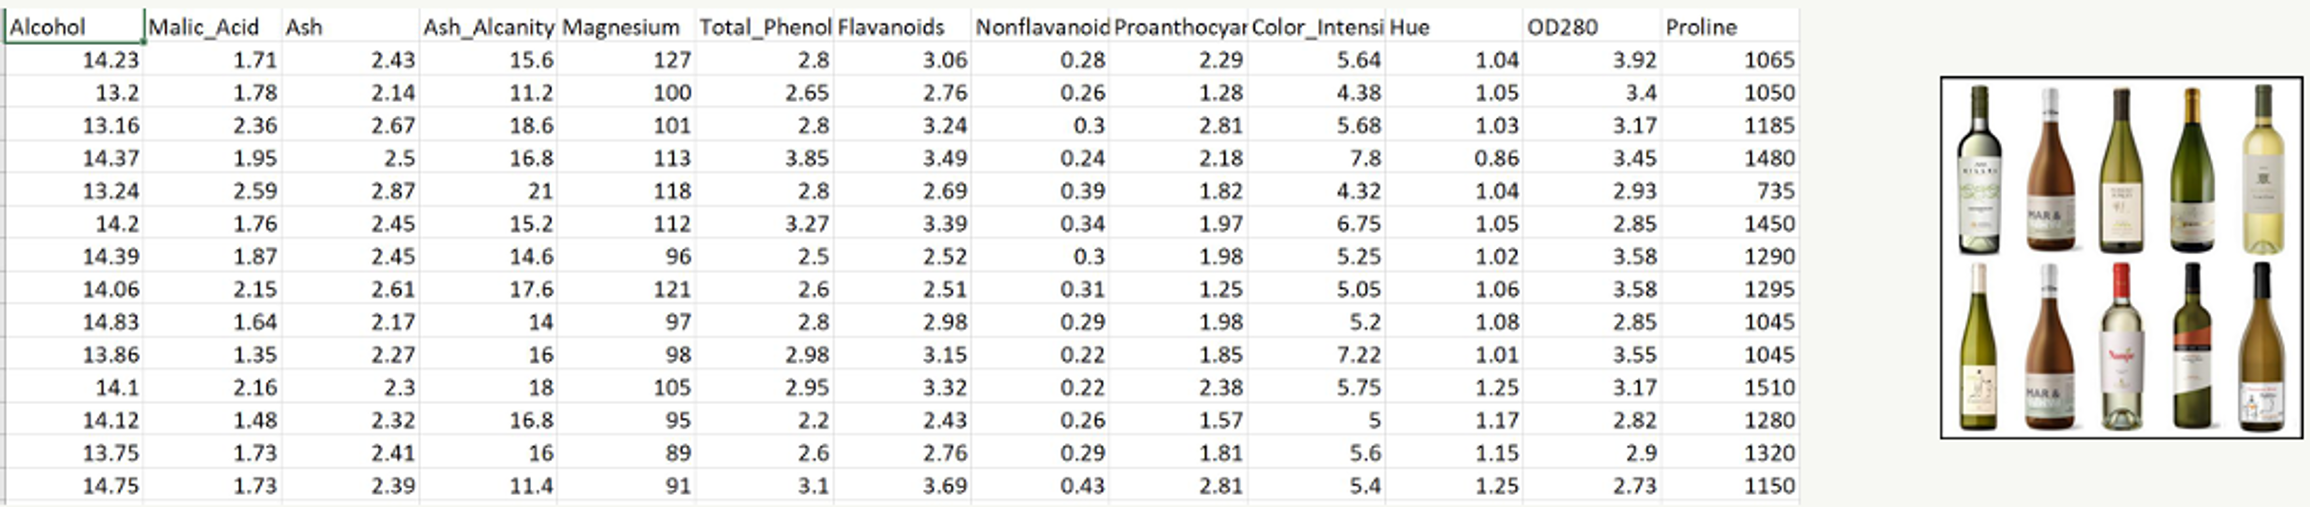
- Mediante el algoritmo de K vecinos más cercanos determine el valor promedio de alcohol que tendrían los 5 vinos más parecidos a aquel con las características siguientes:
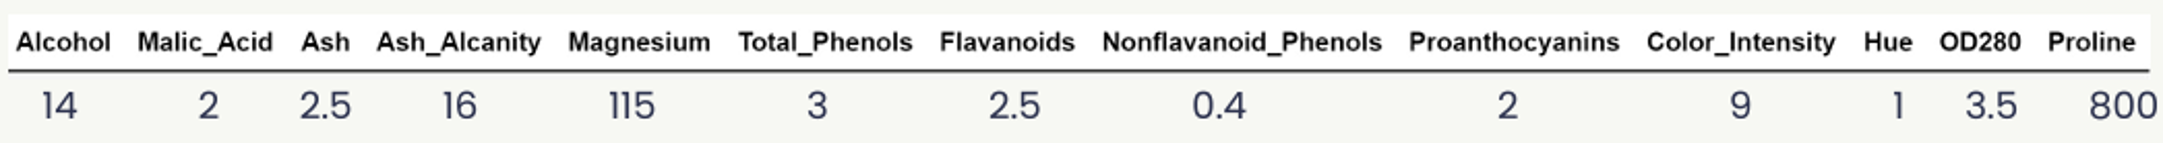
- Asegúrese de detallar las concentraciones de alcohol de cada elemento que haya sido utilizado para obtener dicho valor promedio. 



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [2]:


dataframe = pd.read_csv("wine-clustering.csv")
dataframe 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Diccionario para almacenar los datos
datos_vino = {
    "Alcohol": 14,
    "Malic_Acid": 2,
    "Ash": 2.5,
    "Ash_Alcanity": 16,
    "Magnesium": 115,
    "Total_Phenols": 3,
    "Flavanoids": 2.5,
    "Nonflavanoid_Phenols": 0.4,
    "Proanthocyanins": 2,
    "Color_Intensity": 9,
    "Hue": 1,
    "OD280": 35,
    "Proline": 800
}

print(datos_vino)


{'Alcohol': 14, 'Malic_Acid': 2, 'Ash': 2.5, 'Ash_Alcanity': 16, 'Magnesium': 115, 'Total_Phenols': 3, 'Flavanoids': 2.5, 'Nonflavanoid_Phenols': 0.4, 'Proanthocyanins': 2, 'Color_Intensity': 9, 'Hue': 1, 'OD280': 35, 'Proline': 800}


In [4]:
# Convertir el diccionario a un DataFrame
sample = pd.DataFrame([datos_vino])
sample 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14,2,2.5,16,115,3,2.5,0.4,2,9,1,35,800


In [5]:
X_sample = sample.drop(columns=["Alcohol"])
y_sample = sample["Alcohol"]

In [6]:

# Separar las características y la variable objetivo
X = dataframe.drop(columns=['Alcohol'])
y = dataframe['Alcohol']


In [7]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Entrenar el modelo KNN para regresión
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [9]:

# Encontrar los 5 vinos más parecidos
distances, indices = knn.kneighbors(X_sample, n_neighbors=5)


In [10]:
distances 

array([[32.21784909, 38.88398771, 45.72354864, 45.86212817, 48.95697397]])

In [11]:
indices

array([[ 47, 136, 117,  49, 113]])

In [12]:

# Obtener los valores de alcohol de los 5 vinos más parecidos
alcohol_values = y.iloc[indices[0]]
alcohol_values

47     13.90
136    12.25
117    12.42
49     13.94
113    11.41
Name: Alcohol, dtype: float64

In [13]:

# Calcular el valor promedio de alcohol
promedio_alcohol = alcohol_values.mean()
print(f'El valor promedio de alcohol de los 5 vinos más parecidos es: {promedio_alcohol}')

El valor promedio de alcohol de los 5 vinos más parecidos es: 12.784



## Problema 2:   
- Considere la lista de 11 compras desglosada de la manera siguiente:

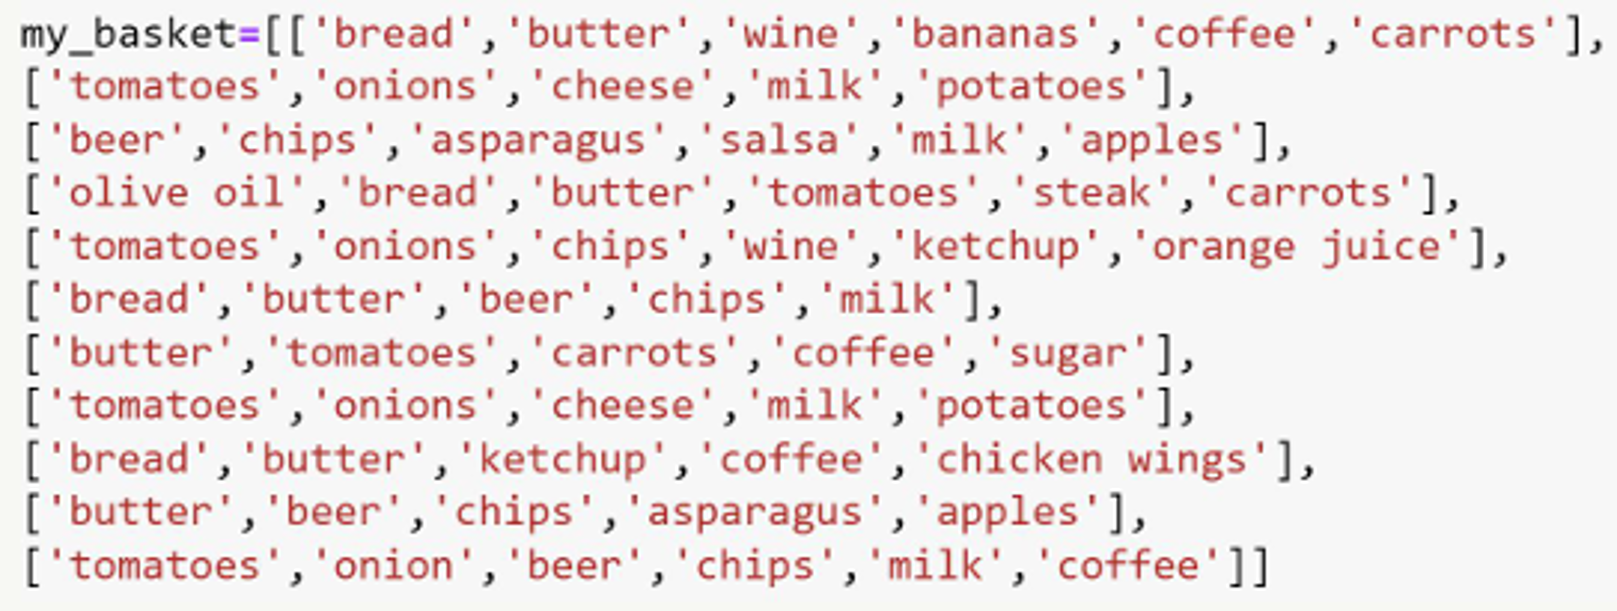

- De acuerdo a la información anterior, se entiende que el primer ticket de compra de la lista consideró la adquisición de los siguientes productos: 
  - bread      
  - butter     
  - wine    
  - bananas    
  - coffee     
  - carrots
- Modifica el código explicado en este módulo para que sea capaz de realizar un análisis mediante el algoritmo “Market basket” a dicha lista de compras con la finalidad de detectar patrones de consumo. Realice a continuación las conclusiones que sean pertinentes sobre sus resultados. 
- Nota importante: tu programa debe ser capaz de correr cualquier lista de compras que venga en el mismo formato que el utilizado para esta actividad.

In [14]:
# Importar bibliotecas necesarias
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

# Convertir la lista en un DataFrame
my_basket = [
    ['bread', 'butter', 'wine', 'bananas', 'coffee', 'carrots'],
    ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
    ['beer', 'chips', 'asparagus', 'salsa', 'milk', 'apples'],
    ['olive oil', 'bread', 'butter', 'tomatoes', 'steak', 'carrots'],
    ['tomatoes', 'onions', 'chips', 'wine', 'ketchup', 'orange juice'],
    ['bread', 'butter', 'beer', 'chips', 'milk'],
    ['butter', 'tomatoes', 'carrots', 'coffee', 'sugar'],
    ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
    ['bread', 'butter', 'ketchup', 'coffee', 'chicken wings'],
    ['butter', 'beer', 'chips', 'asparagus', 'apples'],
    ['tomatoes', 'onion', 'beer', 'chips', 'milk', 'coffee']
]

# Crear un DataFrame con las transacciones
df = pd.DataFrame(my_basket)

# Preprocesar datos
# Convertir el DataFrame en una matriz de transacciones
basket = df.stack().reset_index().pivot_table(index='level_0', columns=0, aggfunc='size', fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Aplicar algoritmo Apriori
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Analizar resultados
# Filtrar reglas con un alto nivel de confianza
rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1)]
rules = pd.DataFrame(rules)

# Mostrar las reglas
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chips),(beer),0.454545,0.363636,0.363636,0.800000,2.200000,0.198347,3.181818,1.000000
1,(beer),(chips),0.363636,0.454545,0.363636,1.000000,2.200000,0.198347,inf,0.857143
2,(milk),(beer),0.454545,0.363636,0.272727,0.600000,1.650000,0.107438,1.590909,0.722222
3,(beer),(milk),0.363636,0.454545,0.272727,0.750000,1.650000,0.107438,2.181818,0.619048
4,(bread),(butter),0.363636,0.545455,0.363636,1.000000,1.833333,0.165289,inf,0.714286
5,(butter),(bread),0.545455,0.363636,0.363636,0.666667,1.833333,0.165289,1.909091,1.000000
7,(carrots),(butter),0.272727,0.545455,0.272727,1.000000,1.833333,0.123967,inf,0.625000
8,(coffee),(butter),0.363636,0.545455,0.272727,0.750000,1.375000,0.074380,1.818182,0.428571
10,(chips),(milk),0.454545,0.454545,0.272727,0.600000,1.320000,0.066116,1.363636,0.444444
11,(milk),(chips),0.454545,0.454545,0.272727,0.600000,1.320000,0.066116,1.363636,0.444444


Para interpretar los resultados del Market Basket Analysis, es importante entender las métricas clave que se generan. Aquí tienes una explicación de cada una de las columnas en el DataFrame de reglas de asociación:

1. **antecedents**: Los productos que se encuentran en el lado izquierdo de la regla (antes de la flecha).
2. **consequents**: Los productos que se encuentran en el lado derecho de la regla (después de la flecha).
3. **antecedent support**: La proporción de transacciones que contienen los productos en los antecedentes.
4. **consequent support**: La proporción de transacciones que contienen los productos en los consecuentes.
5. **support**: La proporción de transacciones que contienen tanto los antecedentes como los consecuentes.
6. **confidence**: La probabilidad de que los productos en los consecuentes estén en una transacción dada que ya contiene los productos en los antecedentes. Se calcula como `support(antecedents + consequents) / support(antecedents)`.
7. **lift**: La razón de la confianza observada a la confianza esperada si los antecedentes y los consecuentes fueran independientes. Un lift mayor que 1 indica una asociación positiva.
8. **leverage**: La diferencia entre el soporte observado de los antecedentes y los consecuentes juntos y el soporte esperado si fueran independientes. Un valor positivo indica una asociación positiva.
9. **conviction**: Una medida de la implicación de los antecedentes en la ocurrencia de los consecuentes. Un valor mayor que 1 indica una asociación positiva.
10. **zhangs_metric**: Una métrica que combina la confianza y el lift para evaluar la fuerza de la asociación.

### Ejemplo de Interpretación

Tomemos la primera segunda como ejemplo:



In [15]:
rules.iloc[1]

antecedents             (beer)
consequents            (chips)
antecedent support    0.363636
consequent support    0.454545
support               0.363636
confidence                 1.0
lift                       2.2
leverage              0.198347
conviction                 inf
zhangs_metric         0.857143
Name: 1, dtype: object



- **Regla**: Si alguien compra [`beer`](command:_github.copilot.openSymbolFromReferences?%5B%22beer%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS32%20KNN%5C%5Cknn.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS32%2520KNN%2Fknn.ipynb%23X26sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS32%20KNN%2Fknn.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X26sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A6%7D%7D%5D%5D "Go to definition"), también comprará [`chips`](command:_github.copilot.openSymbolFromReferences?%5B%22chips%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS32%20KNN%5C%5Cknn.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS32%2520KNN%2Fknn.ipynb%23X26sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS32%20KNN%2Fknn.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X26sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A14%7D%7D%5D%5D "Go to definition").
- **antecedent support**: El 36.36% de las transacciones contienen [`beer`](command:_github.copilot.openSymbolFromReferences?%5B%22beer%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS32%20KNN%5C%5Cknn.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS32%2520KNN%2Fknn.ipynb%23X26sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS32%20KNN%2Fknn.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X26sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A6%7D%7D%5D%5D "Go to definition").
- **consequent support**: El 45.45% de las transacciones contienen [`chips`](command:_github.copilot.openSymbolFromReferences?%5B%22chips%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS32%20KNN%5C%5Cknn.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS32%2520KNN%2Fknn.ipynb%23X26sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS32%20KNN%2Fknn.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X26sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A14%7D%7D%5D%5D "Go to definition").
- **support**: El 36.36% de las transacciones contienen tanto [`beer`](command:_github.copilot.openSymbolFromReferences?%5B%22beer%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS32%20KNN%5C%5Cknn.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS32%2520KNN%2Fknn.ipynb%23X26sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS32%20KNN%2Fknn.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X26sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A6%7D%7D%5D%5D "Go to definition") como [`chips`](command:_github.copilot.openSymbolFromReferences?%5B%22chips%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS32%20KNN%5C%5Cknn.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS32%2520KNN%2Fknn.ipynb%23X26sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS32%20KNN%2Fknn.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X26sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A14%7D%7D%5D%5D "Go to definition").
- **confidence**: El 100% de las transacciones que contienen [`beer`](command:_github.copilot.openSymbolFromReferences?%5B%22beer%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS32%20KNN%5C%5Cknn.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS32%2520KNN%2Fknn.ipynb%23X26sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS32%20KNN%2Fknn.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X26sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A6%7D%7D%5D%5D "Go to definition") también contienen [`chips`](command:_github.copilot.openSymbolFromReferences?%5B%22chips%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS32%20KNN%5C%5Cknn.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS32%2520KNN%2Fknn.ipynb%23X26sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS32%20KNN%2Fknn.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X26sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A14%7D%7D%5D%5D "Go to definition").
- **lift**: La probabilidad de comprar [`chips`](command:_github.copilot.openSymbolFromReferences?%5B%22chips%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS32%20KNN%5C%5Cknn.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS32%2520KNN%2Fknn.ipynb%23X26sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS32%20KNN%2Fknn.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X26sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A14%7D%7D%5D%5D "Go to definition") aumenta en un 120% (2.2 veces) cuando se compra [`beer`](command:_github.copilot.openSymbolFromReferences?%5B%22beer%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cjulih%5C%5Cjcc30986%5C%5CMachine%20Learning%5C%5Cebac-cientifico-datos%5C%5CS32%20KNN%5C%5Cknn.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%2520Learning%2Febac-cientifico-datos%2FS32%2520KNN%2Fknn.ipynb%23X26sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fjulih%2Fjcc30986%2FMachine%20Learning%2Febac-cientifico-datos%2FS32%20KNN%2Fknn.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X26sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A6%7D%7D%5D%5D "Go to definition").
- **leverage**: Hay un 19.83% más de transacciones que contienen ambos productos de lo que se esperaría si fueran independientes.
- **conviction**: La convicción es infinita, lo que indica una fuerte asociación.
- **zhangs_metric**: Un valor de 0.857143 indica una fuerte asociación positiva.

### Conclusión

Las reglas con alta confianza, lift, y convicción son las más interesantes, ya que indican asociaciones fuertes entre productos. Puedes utilizar estas reglas para tomar decisiones de negocio, como promociones conjuntas, disposición de productos en la tienda, o recomendaciones de productos.